In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-life-expectancy/life_expectancy.csv


<div style="width: 100%; padding: 20px; border: 3px solid #191970; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #2F4F4F;">Introduction</h3>
    <span >The research on life expectancy in countries takes the spotlight in the notebook's machine learning model. Substantial data analysis and predictive algorithms are used to uncover the reasons causing differences in longevity among countries. With the aid of strong statistical tools, valuable insights into the complex link between healthcare, socioeconomic factors, and life expectancy are sought. Each line of code in this project strives to unravel the riddles behind human lifespan, ultimately contributing to a deeper knowledge of global health inequities.
    </span> 
    <h3 style="color: #2F4F4F;">Tasks in this notebook</h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Dataset overview</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Import libraries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Read dataset and get information from data</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Cleaning Data</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Data visualization</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Features</li>
        <li>
            <span style="margin-left: -10px;">&#8226;</span> Modeling
            <ul style="list-style-type: none; padding-left: 20px;">
                <li><span style="margin-left: -10px;">&#8226;</span> Linear Regression</li>
                <li><span style="margin-left: -10px;">&#8226;</span> KNeighbors Regressor</li>
                <li><span style="margin-left: -10px;">&#8226;</span> Decision Tree Regressor</li>
            </ul>
        </li>
        <li><span style="margin-left: -10px;">&#8226;</span>Predictions visualization</li>
    </ul>
</div>


<h2 style="position: relative;">
    <span style="color: #000000;">Dataset Overview</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #000000;">
</h2>

<center>
<table style="direction: rtl; line-height: 200%; font-family: vazir; font-size: medium;">
  <tr>
    <th>Description</th>
    <th>Column</th>
  </tr>
  <tr>
    <td>Country under study</td>
    <td><code>Country</code></td>
  </tr>
  <tr>
    <td>Year</td>
    <td><code>Year</code></td>
  </tr>
  <tr>
    <td>Status of the country's development</td>
    <td><code>Status</code></td>
  </tr>
  <tr>
    <td>Population of country</td>
    <td><code>Population</code></td>
  </tr>
  <tr>
    <td>Percentage of people finally one year old who were immunized against hepatitis B</td>
    <td><code>Hepatitis B</code></td>
  </tr>
  <tr>
    <td>The number of reported measles cases per 1000 people</td>
    <td><code>Measles</code></td>
  </tr>
  <tr>
    <td>Percentage of 1-year-olds immunized against polio</td>
    <td><code>Polio</code></td>
  </tr>
  <tr>
    <td>Percentage of people finally one year old who were immunized against diphtheria</td>
    <td><code>Diphtheria</code></td>
  </tr>
  <tr>
    <td>The number of deaths caused by AIDS of the last 4-year-olds who were born alive per 1000 people</td>
    <td><code>HIV/AIDS</code></td>
  </tr>
  <tr>
    <td>The number of infant deaths per 1000 people</td>
    <td><code>infant deaths</code></td>
  </tr>
  <tr>
    <td>The number of deaths of people under 5 years old per 1000 people</td>
    <td><code>under-five deaths</code></td>
  </tr>
  <tr>
    <td>The ratio of government medical-health expenses to total government expenses in percentage</td>
    <td><code>Total expenditure</code></td>
  </tr>
  <tr>
    <td>Gross domestic product</td>
    <td><code>GDP</code></td>
  </tr>
  <tr>
    <td>The average body mass index of the entire population of the country</td>
    <td><code>BMI</code></td>
  </tr>
  <tr>
    <td>Prevalence of thinness among people 19 years old in percentage</td>
    <td><code>thinness 1-19 years</code></td>
  </tr>
  <tr>
    <td>Liters of alcohol consumption among people over 15 years old</td>
    <td><code>Alcohol</code></td>
  </tr>
  <tr>
    <td>The number of years that people study</td>
    <td><code>Schooling</code></td>
  </tr>
  <tr>
    <td>Country life expectancy</td>
    <td><code><b>Life expectancy [target variable]</b></code></td>
  </tr>
</table>
</center>

<h2 style="position: relative;">
    <span style="color: #000000;">Libraries</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #000000;">
</h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

<h2 style="position: relative;">
    <span style="color: #000000;">Read Data</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #000000;">
</h2>

In [4]:
data = pd.read_csv('/kaggle/input/countries-life-expectancy/life_expectancy.csv')
data.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [7]:
data. describe()

,Year,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
count,2848.000000,2.204000e+03,2306.000000,2848.000000,2829.000000,2829.000000,2848.000000,2848.000000,2848.000000,2627.000000,2406.000000,2816.000000,2816.000000,2660.000000,2688.000000,2848.000000
mean,2007.500000,1.283457e+07,81.076756,2083.082163,82.682220,82.451396,1.756461,28.359902,39.500000,5.935577,7664.398813,38.503374,4.847230,4.638932,12.060156,69.347402
std,4.610582,6.196094e+07,25.019068,10249.107207,23.434954,23.693936,5.148935,117.188032,159.800866,2.504439,14466.241793,19.955485,4.443695,4.064721,3.320160,9.528332
min,2000.000000,3.400000e+01,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.000000,0.370000,1.681350,1.000000,0.100000,0.010000,0.000000,36.300000
25%,2003.750000,1.967585e+05,77.000000,0.000000,78.000000,78.000000,0.100000,0.000000,0.000000,4.240000,477.541713,19.500000,1.600000,0.930000,10.200000,63.500000
50%,2007.500000,1.391756e+06,92.000000,16.000000,93.000000,93.000000,0.100000,3.000000,4.000000,5.760000,1841.086830,43.900000,3.300000,3.785000,12.400000,72.200000
75%,2011.250000,7.438947e+06,97.000000,336.750000,97.000000,97.000000,0.700000,20.000000,25.000000,7.530000,6265.658907,56.200000,7.125000,7.810000,14.300000,75.800000
max,2015.000000,1.293859e+09,99.000000,212183.000000,99.000000,99.000000,50.600000,1800.000000,2500.000000,17.600000,119172.741800,77.600000,27.700000,17.870000,20.700000,89.000000


In [8]:
data. describe(include='object')

,Country,Status
count,2848,2848
unique,178,2
top,Afghanistan,Developing
freq,16,2352


<h2 style="position: relative;">
    <span style="color: #000000;">Data Preprocessing</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #000000;">
</h2>

In [9]:
data.isnull().sum()

Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64

In [10]:
class Preprocessing():
    def __init__(self):
        self.col_means = {}
        self.col_medians = {}
    
    def fit(self, d):
        nacols = d.isna().sum()[d.isna().sum()>0].index.tolist()
        for col in nacols:
            self.col_means[col]= d.groupby('Country')[col].transform('mean')
            self.col_medians[col] = d[col].median()
    
    
    def transform(self, d):
        nacols = d.isna().sum()[d.isna().sum()>0].index.tolist()
        for col in nacols:
            mean = self.col_means[col]
            d.loc[:, col].fillna(mean, inplace=True)
        
        for col in nacols:
            median = self.col_medians[col]
            d.loc[:, col].fillna(median, inplace=True)
                
                
        d['Status'].replace({'Developing':0, 'Developed': 1}, inplace=True)
        return d
                
                
    def fit_transform(self, d):
        self.fit(d)
        return self.transform(d)
    

preprocessor = Preprocessing()
data = preprocessor.fit_transform(data)

                

In [11]:
data.isnull().sum()

Country                 0
Year                    0
Status                  0
Population              0
Hepatitis B             0
Measles                 0
Polio                   0
Diphtheria              0
HIV/AIDS                0
infant deaths           0
under-five deaths       0
Total expenditure       0
GDP                     0
BMI                     0
thinness  1-19 years    0
Alcohol                 0
Schooling               0
Life expectancy         0
dtype: int64

In [12]:
data.duplicated().sum()

0

<h2 style="position: relative;">
    <span style="color: #000000;">Data Visualization</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #000000;">
</h2>

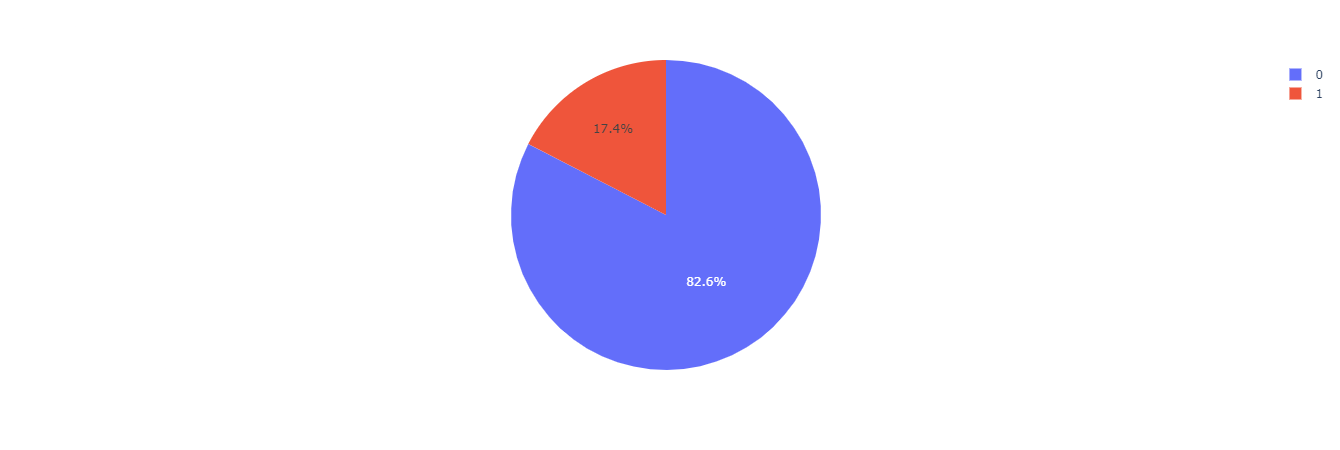

In [13]:
px.pie(data,names='Status')

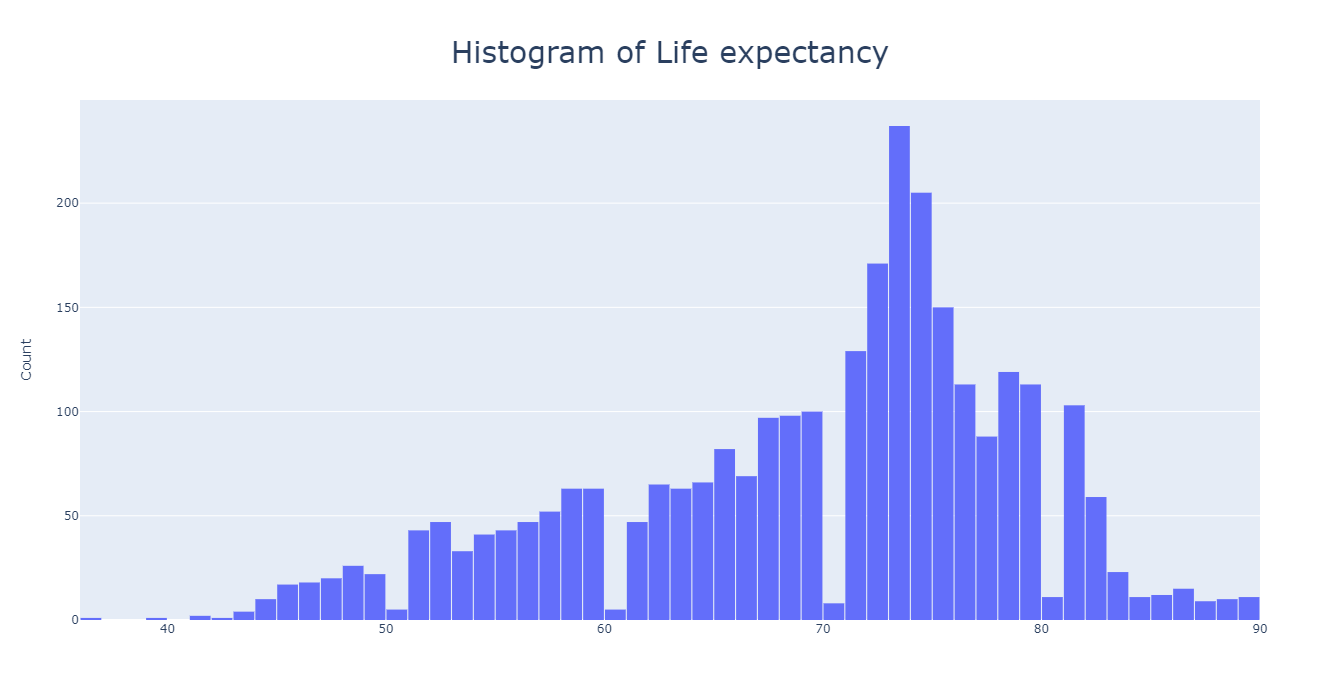

In [14]:
# Life expectency
fig = go.Figure(data= [go.Histogram(x=data['Life expectancy'], xbins={'start':36.0, 'end':90.0, 'size': 1.0})],
          layout=go.Layout(title=dict(text="Histogram of Life expectancy", x=0.5, y=0.94),
                           yaxis={"title": "Count"}, title_font_size=30,bargap=0.05,height=700)
         )

fig


### Correlation

In [16]:
cols = data.columns.to_list
cols = ['Year', 'Status', 'Population', 'Hepatitis B', 'Measles',
       'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths', 'under-five deaths',
       'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol',
       'Schooling', 'Life expectancy']
df= data[cols]


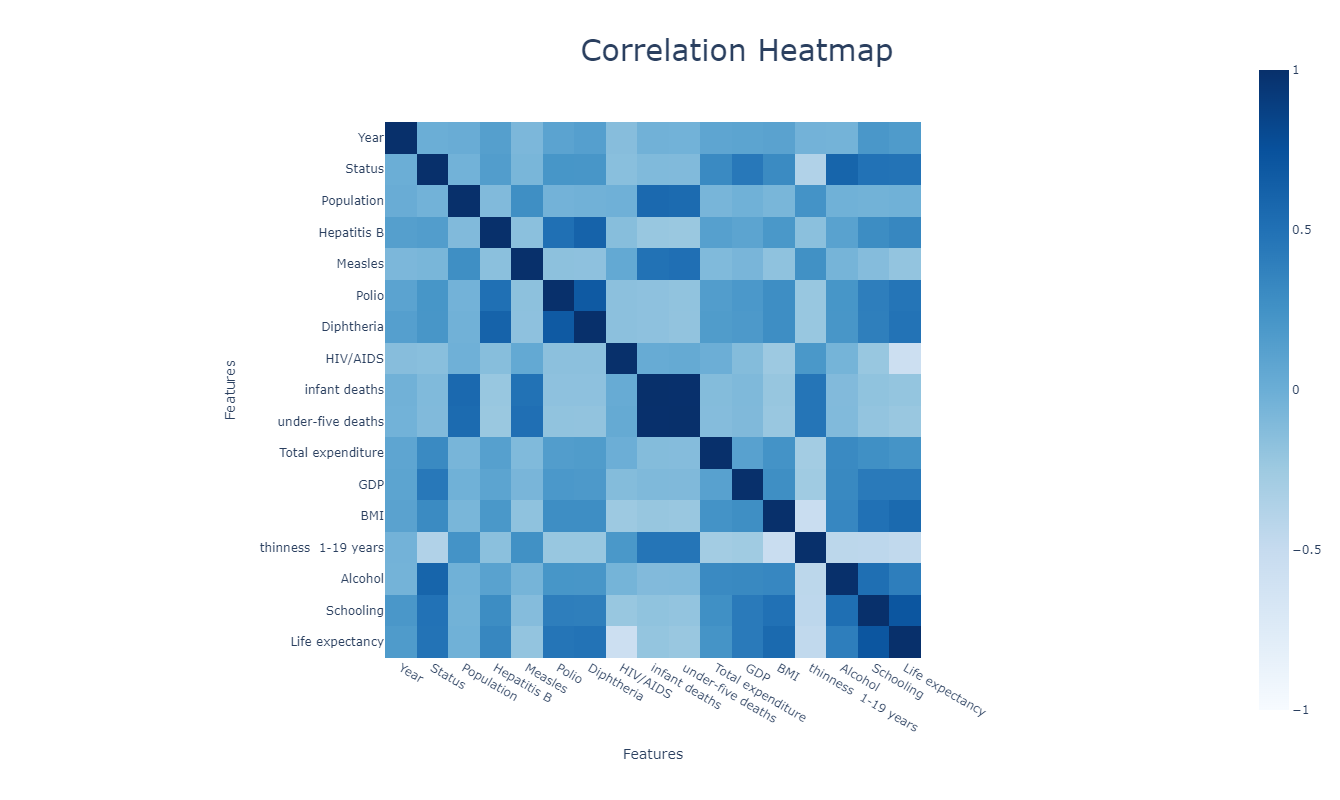

In [26]:
df_corr = df.corr()

fig = px.imshow(df_corr,
                labels=dict(x="Features", y="Features"),
                x=df_corr.columns,
                y=df_corr.columns,
                color_continuous_scale="Blues",
                color_continuous_midpoint=0)

fig.update_layout(
    title=dict(text="Correlation Heatmap", x=0.55, y=0.95),
    title_font_size= 30,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed')

fig.show()

<h2 style="position: relative;">
    <span style="color: #000000;"> Features</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #000000;">
</h2>

In [35]:
data.drop(['Country'], axis=1, inplace=True)

In [36]:
X=data.drop('Life expectancy', axis=1)
y=data['Life expectancy']

<h2 style="position: relative;">
    <span style="color: #000000;">Modeling</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #000000;">
</h2>

#### Linear Regression

In [78]:
model = LinearRegression()
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')


std_scalar = StandardScaler()
poly_transformer = PolynomialFeatures(degree=2)


for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state)
        X_train = std_scalar.fit_transform(X_train)
        X_test = std_scalar.transform(X_test)
        poly_transformer.fit(X_train)
        poly_features= poly_transformer.transform(X_train)
        
        model.fit(poly_features, y_train)
        
        valid_poly_features = poly_transformer.transform(X_test)
        y_pred = model.predict(valid_poly_features)
        r2 = r2_score(y_test, y_pred)
        
        if r2>best_r2_score:
            best_r2_score=r2
            best_test_size= test_size
            best_random_state = random_state
            
        

In [79]:
print(f'''
Best test size is: {best_test_size}.

Best random state is: {best_random_state}.

Best r2 is: {best_r2_score}.''')


Best test size is: 0.1.

Best random state is: 42.

Best r2 is: 0.8957667782735437.


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state)
X_train = std_scalar.fit_transform(X)
X_test = std_scalar.transform(X)
poly_transformer.fit(X_train)
poly_features= poly_transformer.transform(X)
model.fit(poly_features, y)
valid_poly_features = poly_transformer.transform(X)
y_pred = model.predict(valid_poly_features)


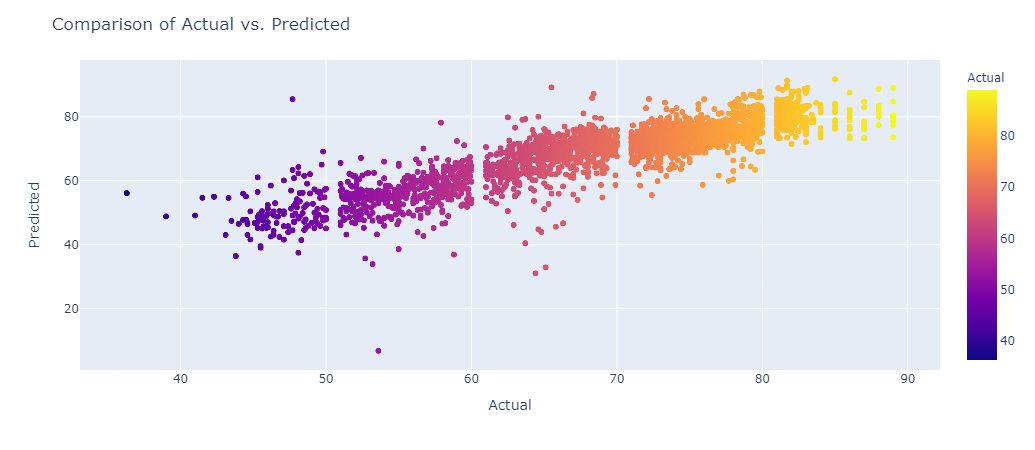

In [87]:
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

fig = px.scatter(comparison_df, x='Actual', y='Predicted', color='Actual')
fig.update_layout(
    title='Comparison of Actual vs. Predicted',
    xaxis_title='Actual',
    yaxis_title='Predicted'
)
fig.show()

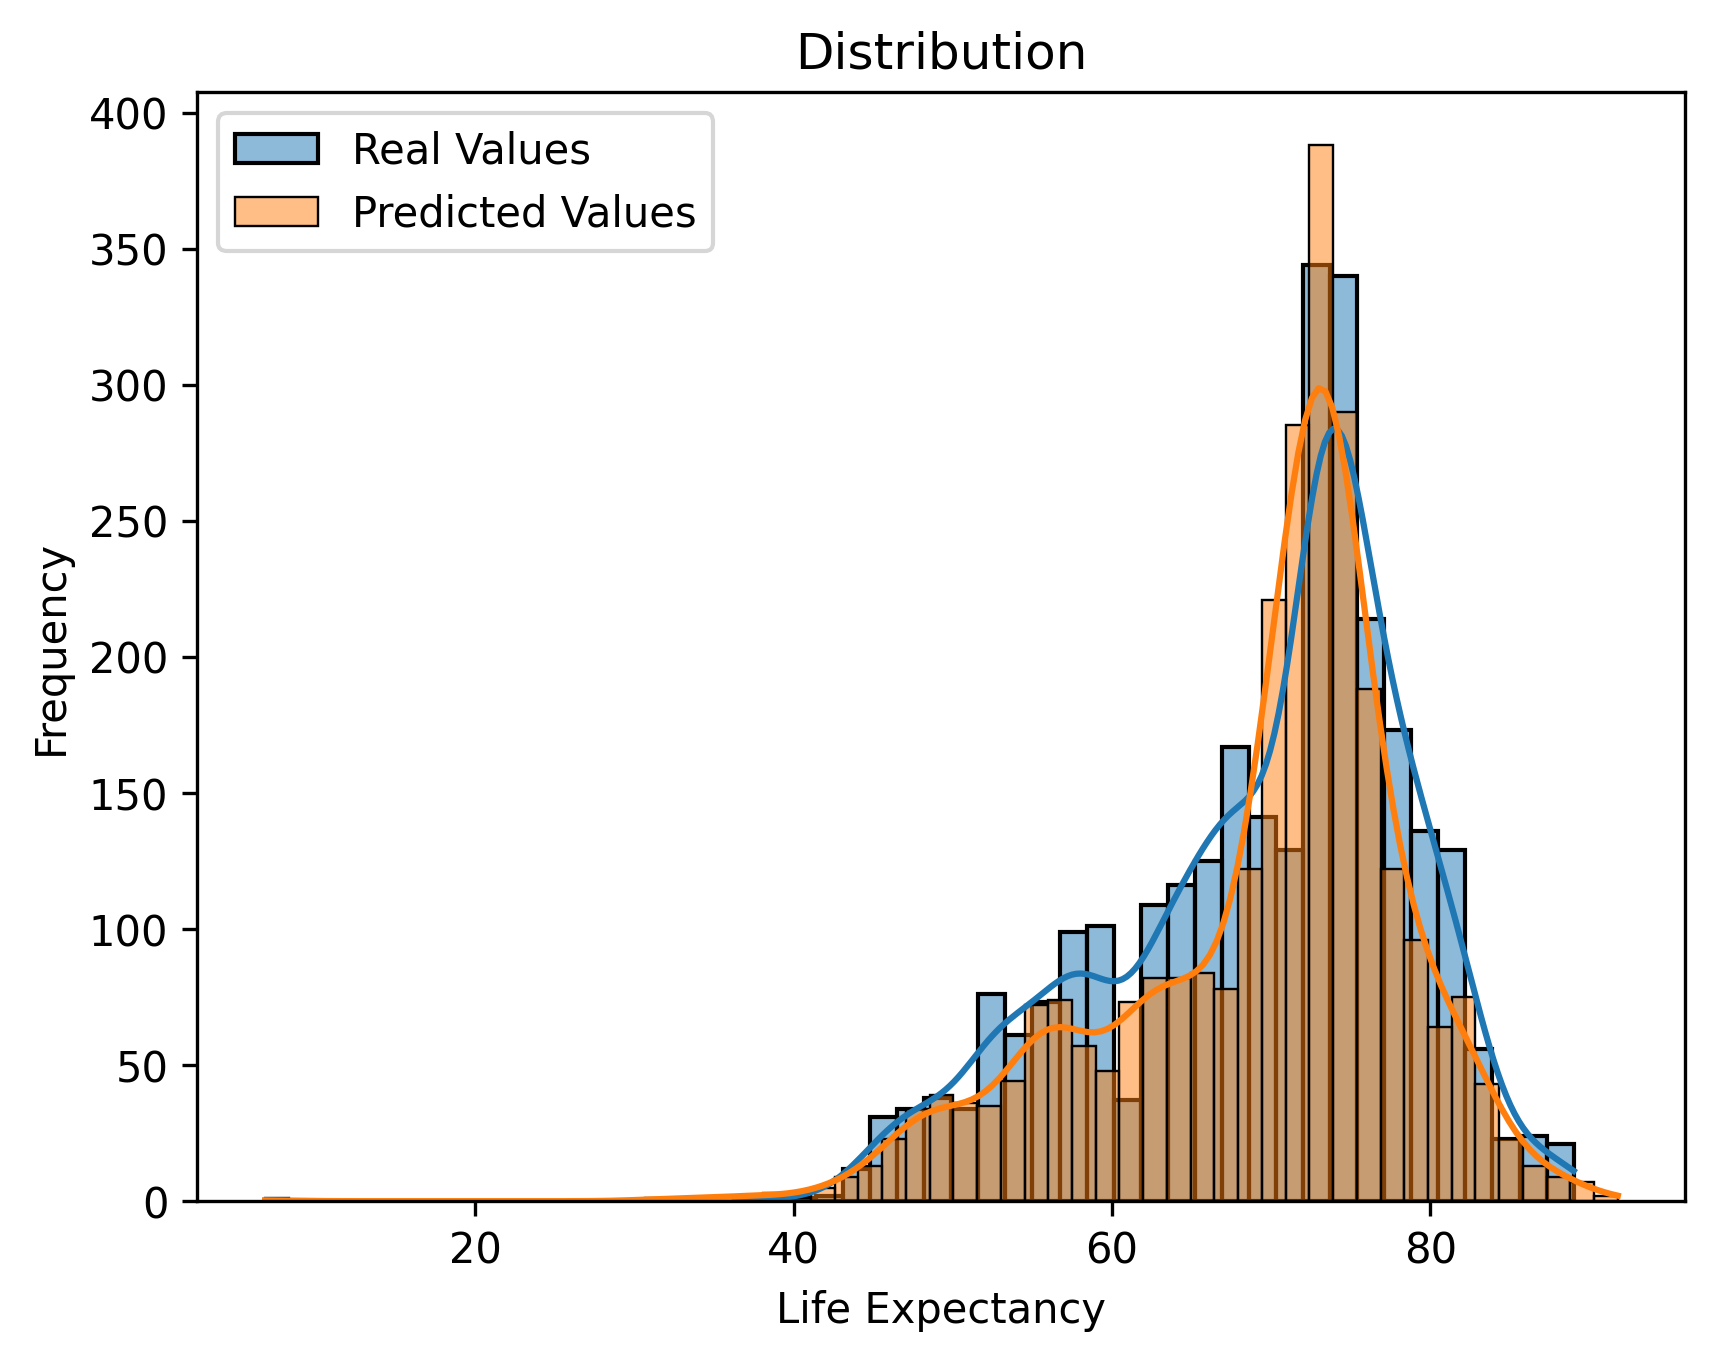

In [88]:
plt.figure(dpi=300)
sns.histplot(data['Life expectancy'], kde=True, label='Real Values')
sns.histplot(y_pred, kde=True, label='Predicted Values')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.legend()
plt.show();

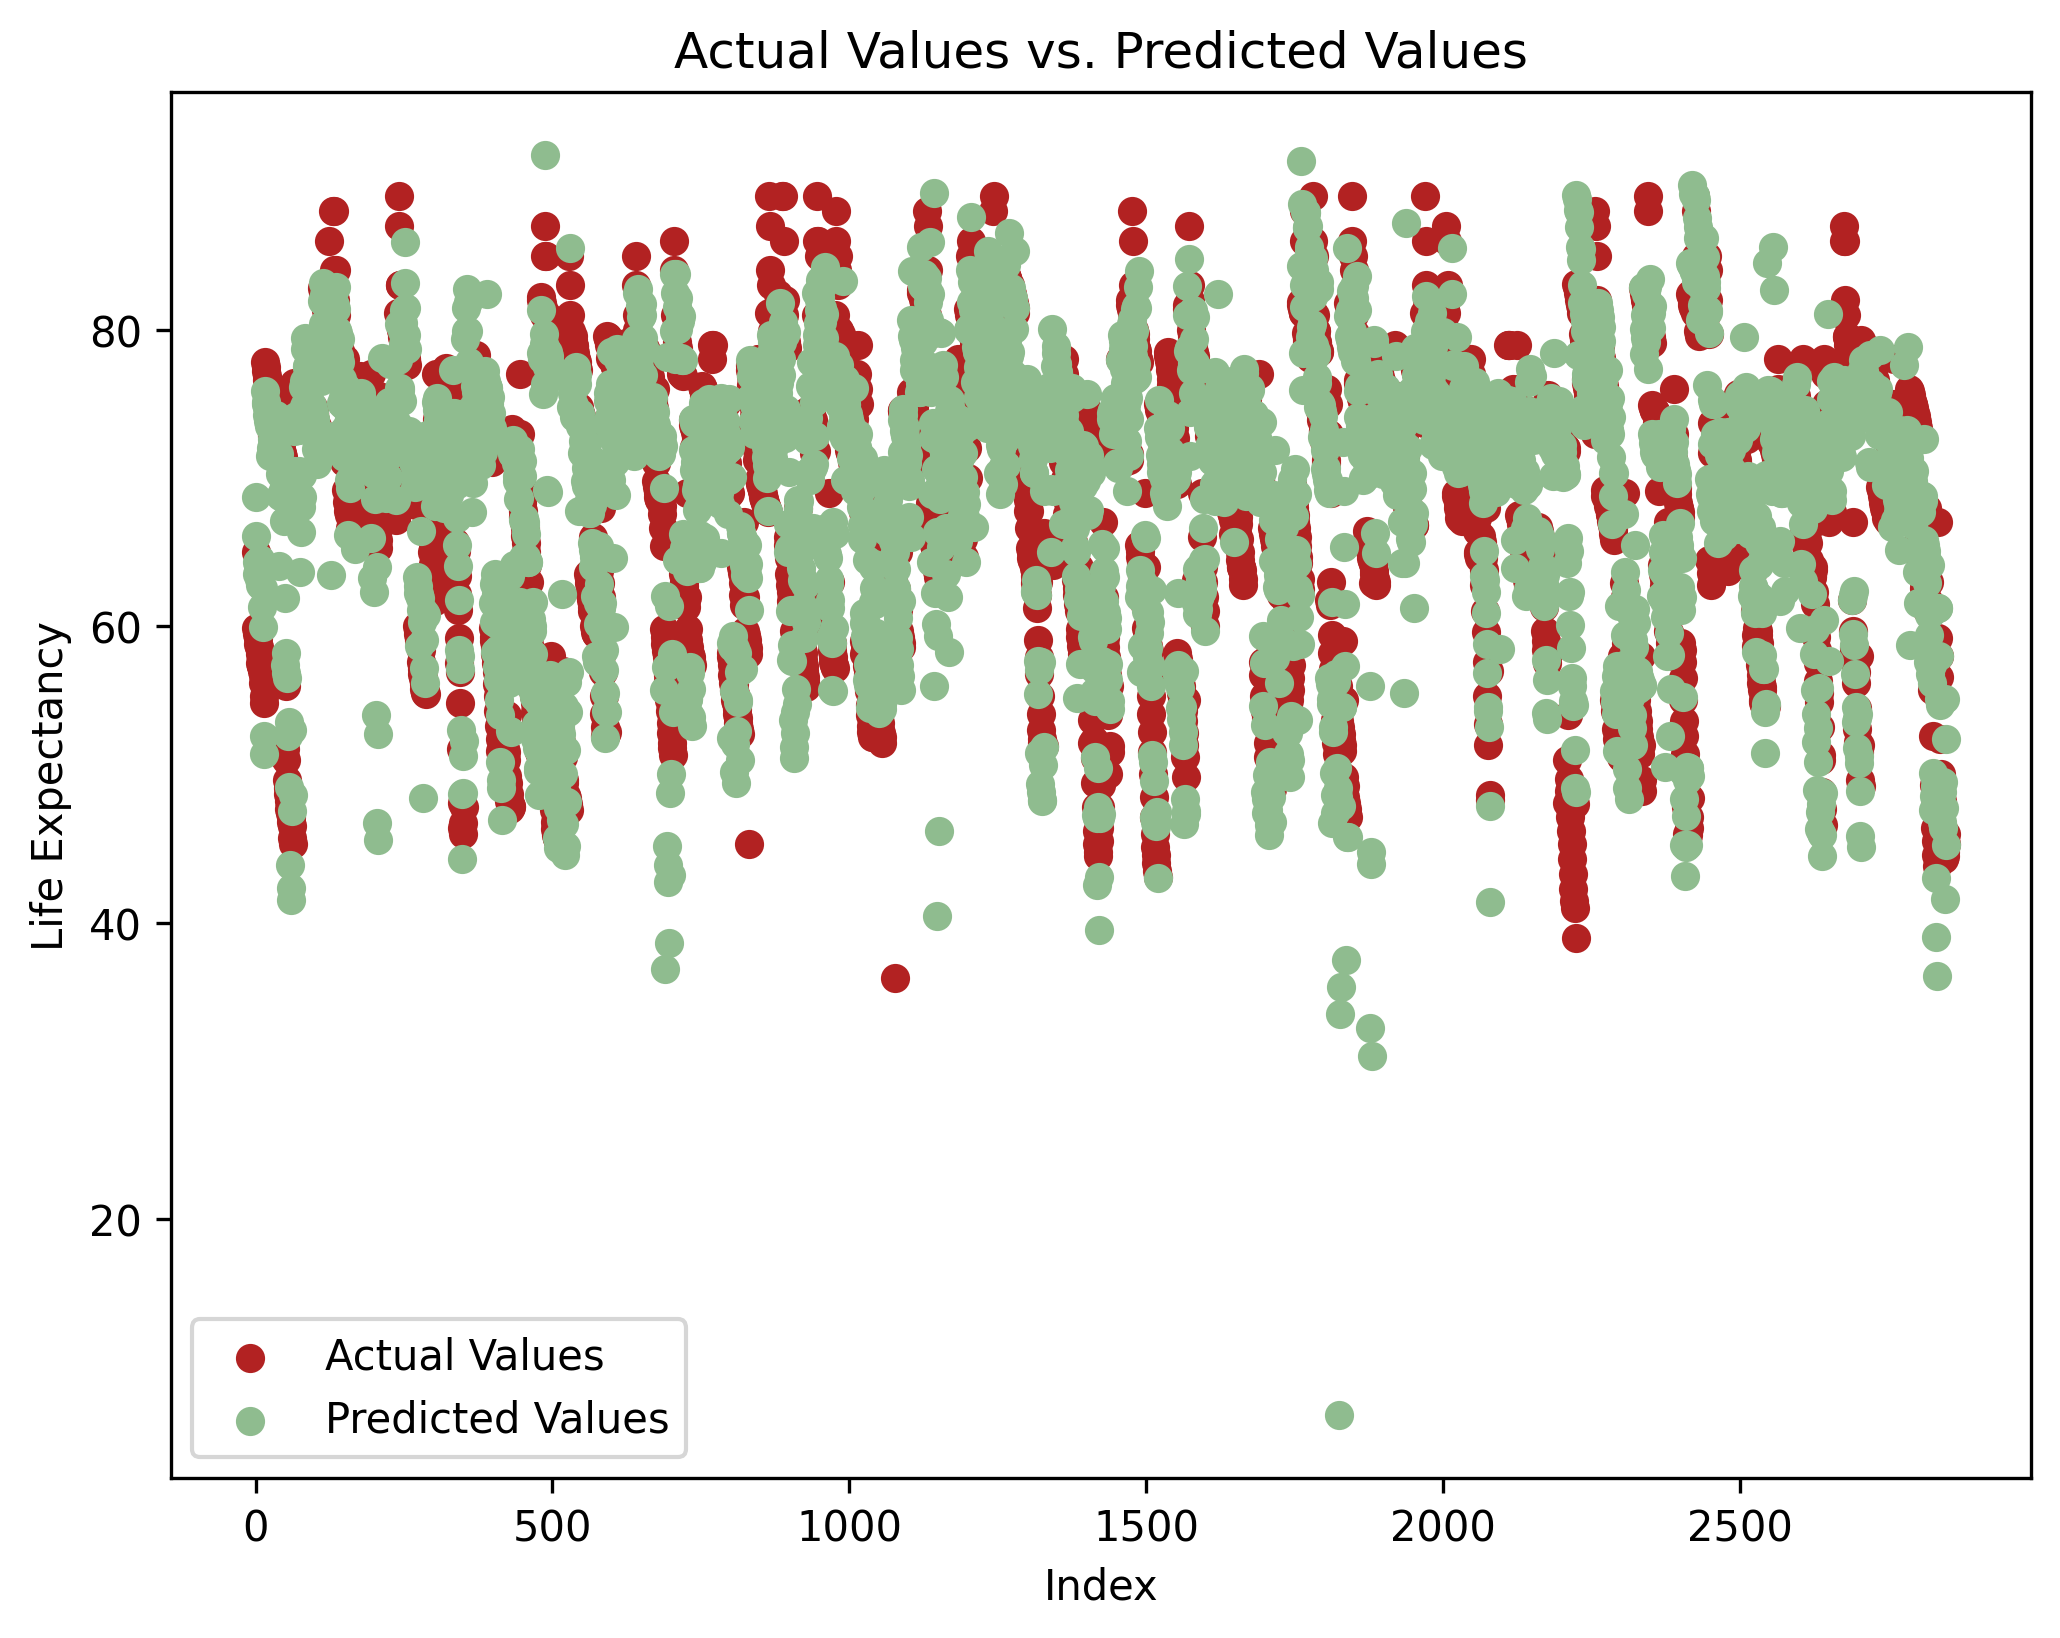

In [94]:
plt.figure(figsize=(8, 6),dpi=300)
plt.scatter(range(len(y)), y, color='#B22222', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='#8FBC8F', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Life Expectancy')
plt.title('Actual Values vs. Predicted Values')
plt.legend()
plt.show()


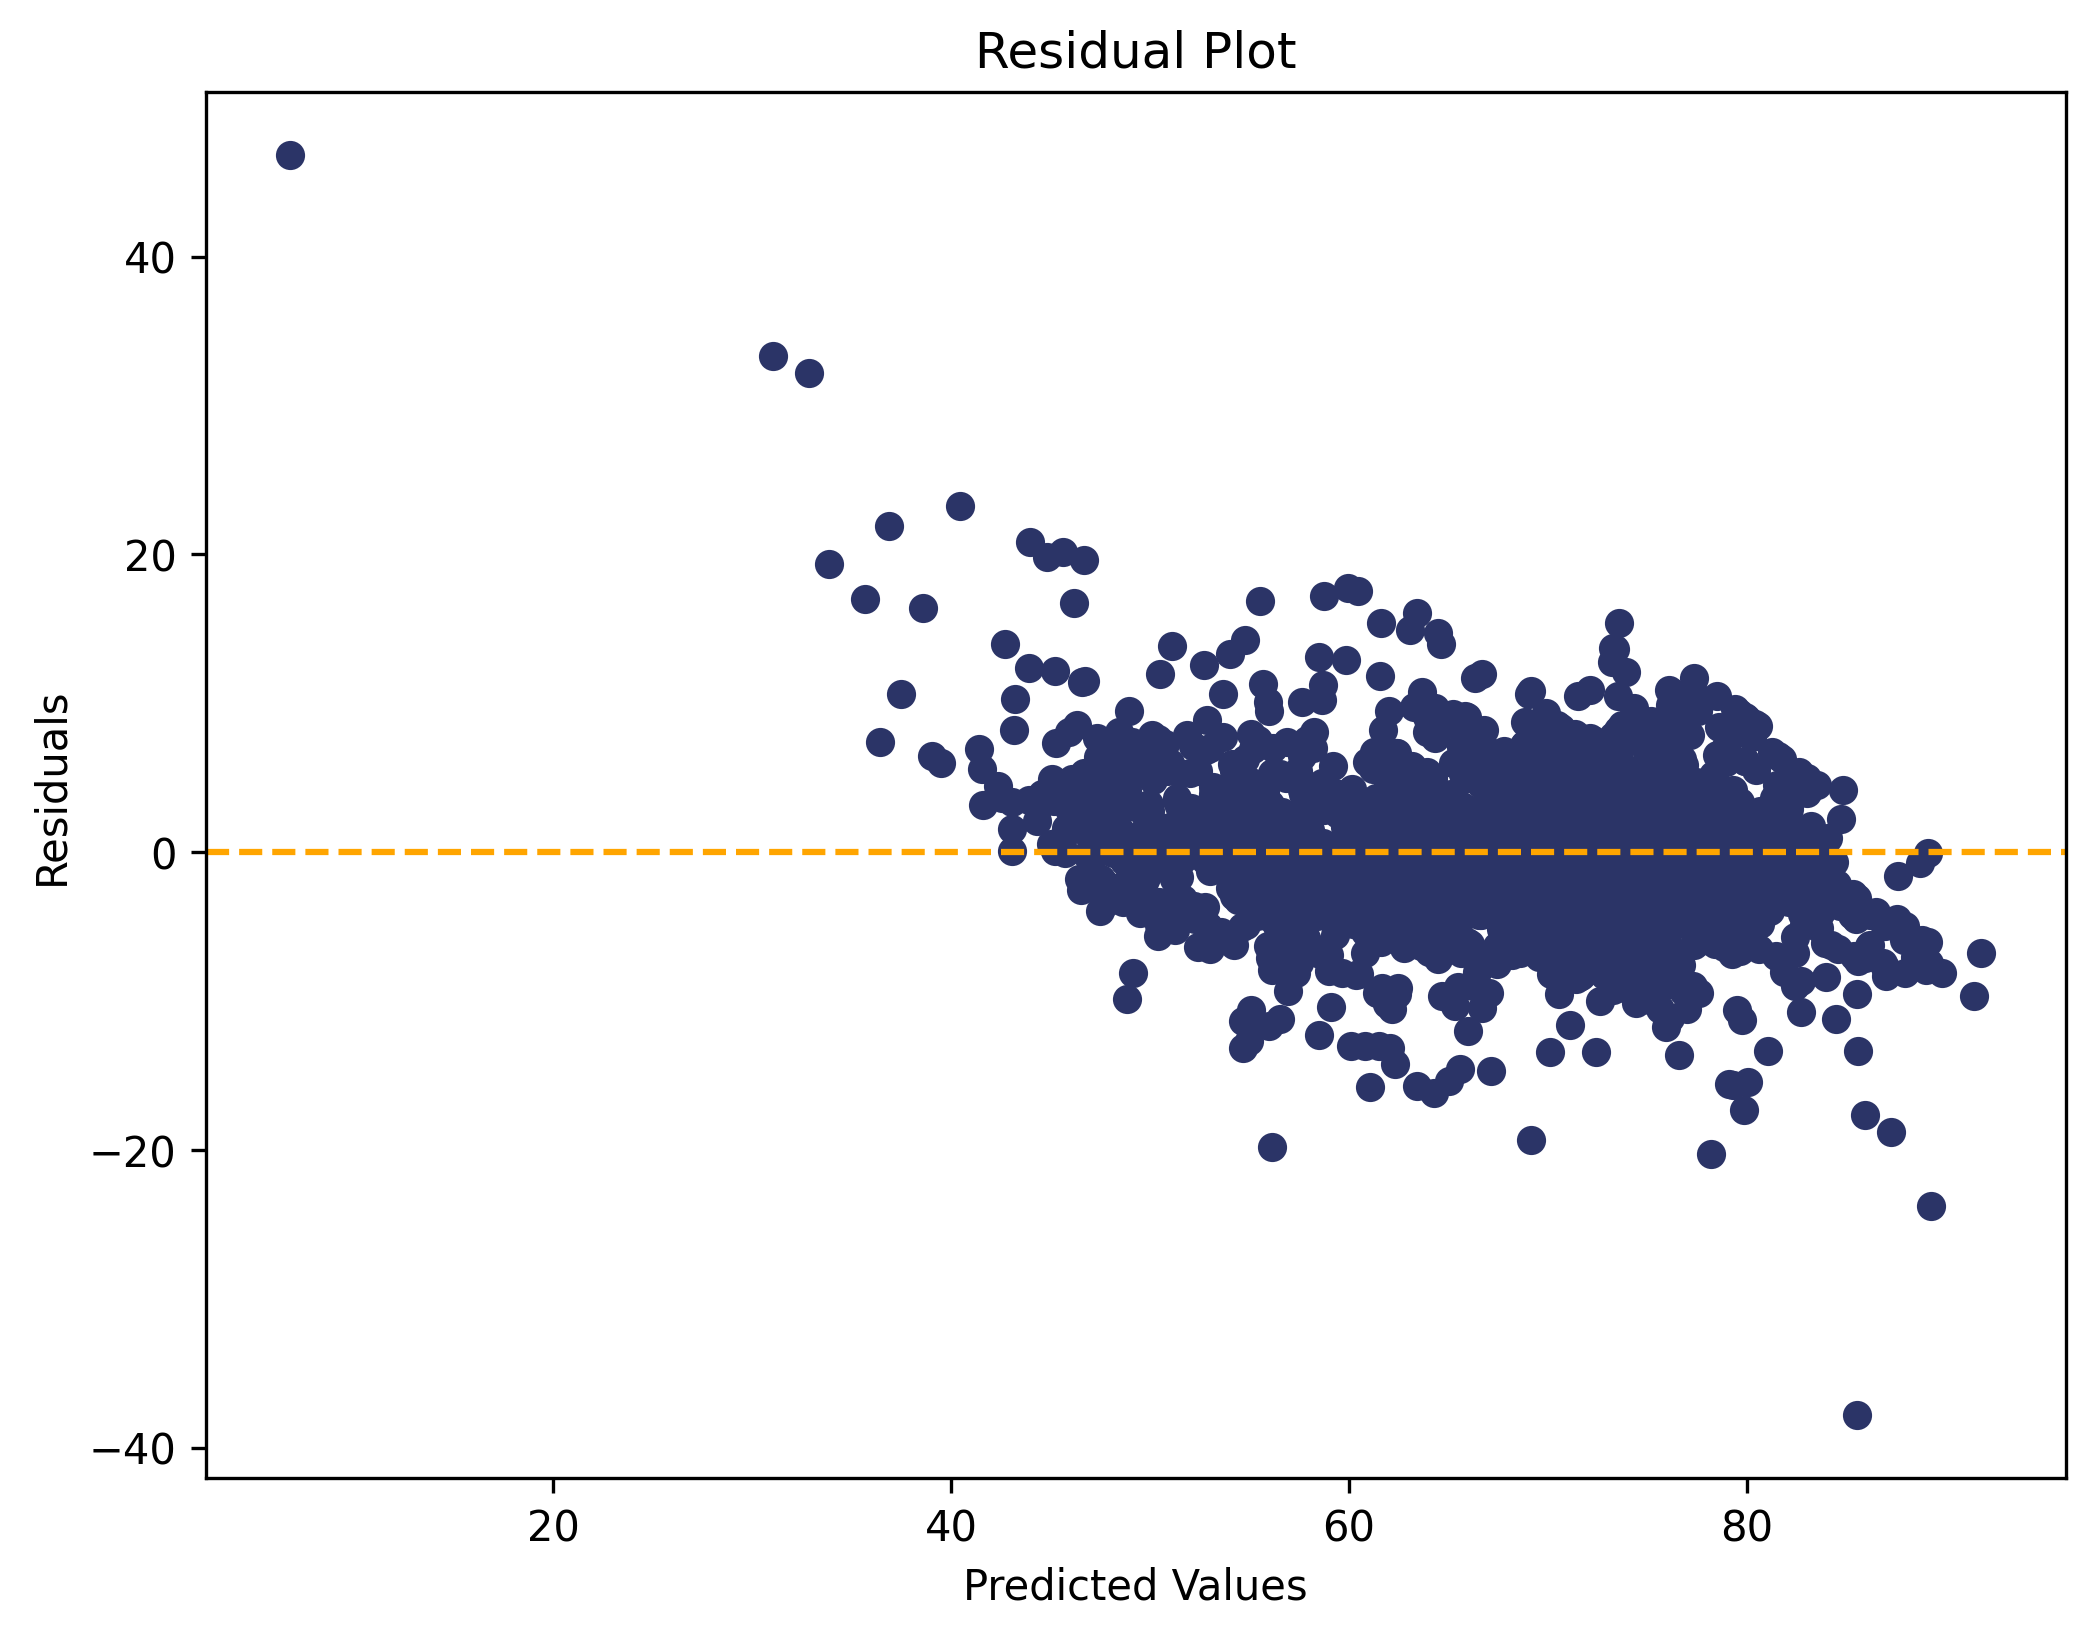

In [95]:
residuals = y - y_pred

plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(y_pred, residuals, color='#2B3467')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show();

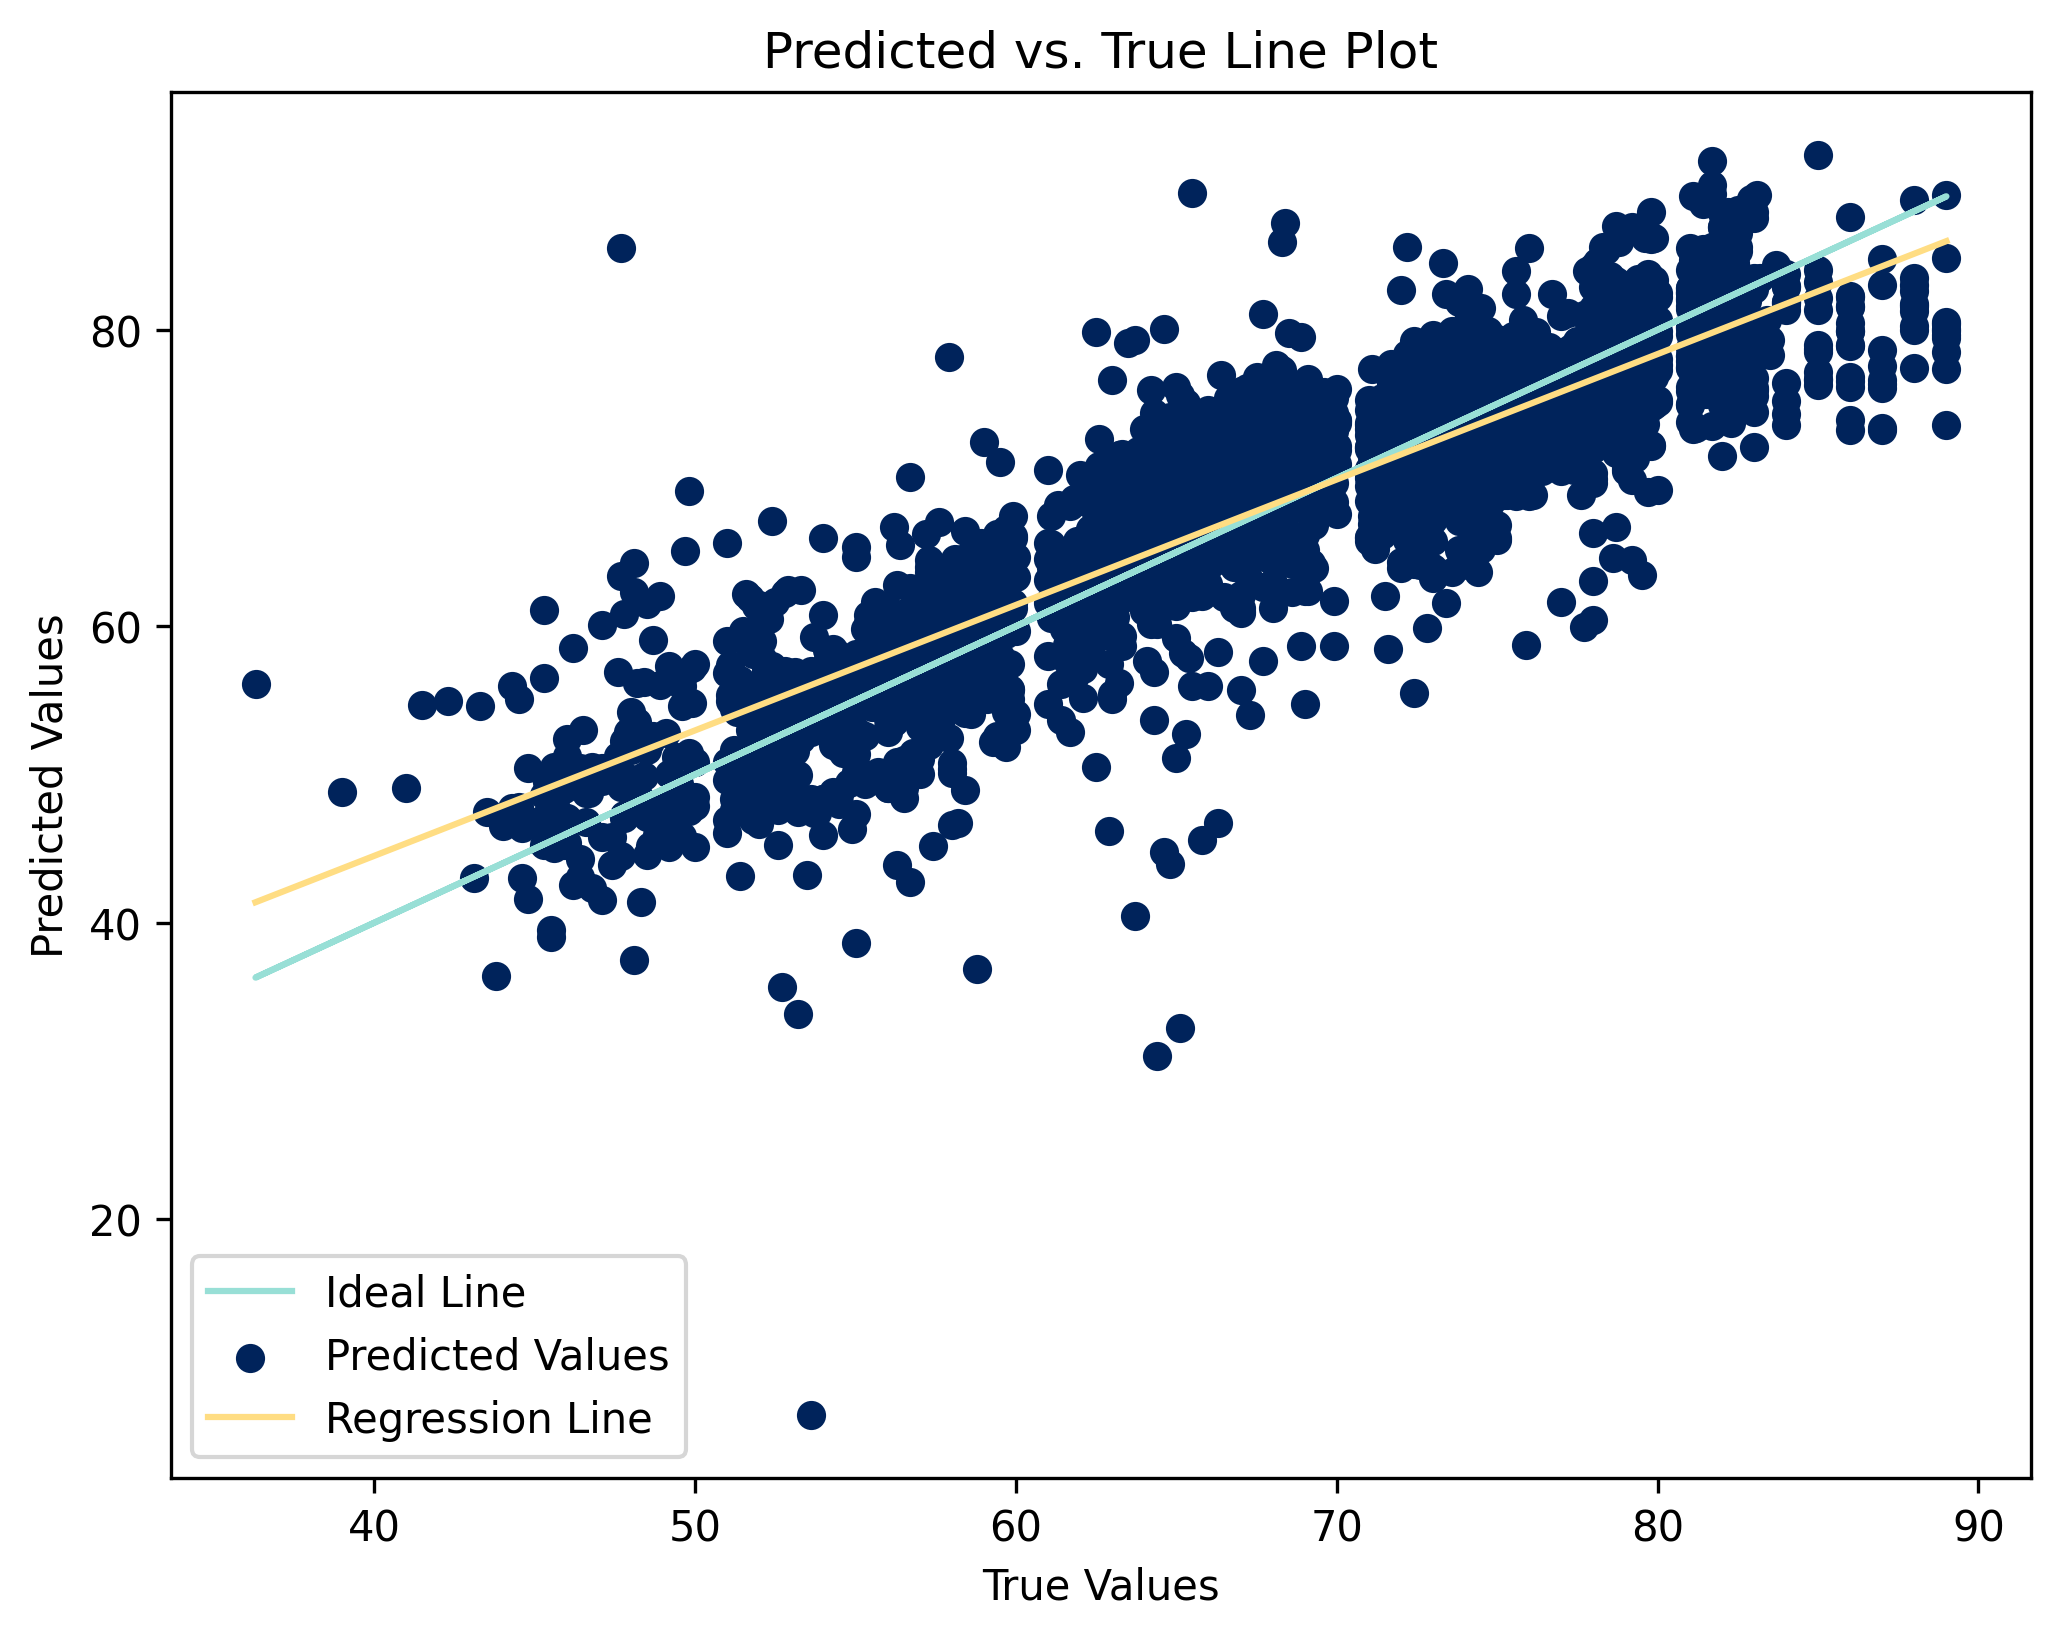

In [97]:
plt.figure(figsize=(8, 6),dpi=300)
plt.plot(y, y, color='#98DFD6', label='Ideal Line')
plt.scatter(y, y_pred, color='#00235B', label='Predicted Values')
plt.plot(np.unique(y), np.poly1d(np.polyfit(y, y_pred, 1))(np.unique(y)), color='#FFDD83', label='Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Line Plot')
plt.legend()
plt.show()